In [1]:
:opt no-lint

# More Haskell Programming

* [Recursive functions over lists](#Recursive-functions-over-lists)
* [Higher-order functions over lists](#Higher-order-functions-over-lists)
* [Recursive data types](#Recursive-data-types)

## Recursive functions over lists
(리스트에 대한 재귀함수)

In [2]:
sum [1,2,3,4]
product [1,2,3,4]

10

24

In [3]:
mysum []     = 0             -- 귀납 기초에 해당하는 경우  base case
mysum (x:xs) = x + mysum xs  -- 귀납 단계에 해당한는 경우 inductive case

myproduct []     = 1                 -- base case
myproduct (x:xs) = x * myproduct xs  -- inductive case

In [4]:
mysum [1,2,3,4]
myproduct [1,2,3,4]

10

24

## Higher-order functions over lists
(리스트에 대한 고차함수)

### `map`

```haskell
f :: a -> b
x1, x2, x3, x4 :: a
```
위와 같은 함수 `f`와 `x1`~`x4`에 대해 `map` 함수를 활용해 계산하면 아래와 같은 성질이 성립
```haskell
map f [x1, x2, x3, x4] == [f x1, f x2, f x3, f x4]
```

In [5]:
l = [1..10]

l

[1,2,3,4,5,6,7,8,9,10]

In [6]:
:type map

map :: forall a b. (a -> b) -> [a] -> [b]

In [7]:
map (\x -> 2*x) l -- 람다식으로 간단한 함수를 표현
map (2*) l        -- 위와 같은 형태의 중위 연산자의 한쪽에 인자를 넘기는 람다식을 이와 같이 줄일 수 있다

[2,4,6,8,10,12,14,16,18,20]

[2,4,6,8,10,12,14,16,18,20]

In [8]:
(\x -> 2*x) 10
(2*) 10
2 * 10

20

20

20

#### `map`을 리스트 조건제시식으로

리스트를 집합처럼 생각해 본다면,
어떤 집합 $L$의 원소 각각에 적용가능한 함수 $f$가 있을 때,
집합의 조건제시법 표현으로 다음과 같이 나타낼 수 있을 것이다.

$\qquad \texttt{map}~f~L ~=~ \{f(x) \mid x\in L\}$

이를 본딴 하스켈의 리스트 조건제시식 문법으로 다음과 같이 작성할 수 있다.
```haskell
map f l = [ f x | x <- l ]
```

In [9]:
l
[2*x | x<-l] -- 리스트 조건제시식으로 위에서 map을 사용해 계산한 것과 똑같은 계산

[1,2,3,4,5,6,7,8,9,10]

[2,4,6,8,10,12,14,16,18,20]

### `filter`

```haskell
p :: a -> Bool
x1,x2,x3,x4 :: a

p x1 == False
p x2 == True
p x3 == True
p x4 == False
```
위와 같은 함수 `p`와 `x1`~`x4`에 대해 `filter` 함수를 활용해 계산하면 아래와 같은 성질이 성립
```haskell
filter p [x1, x2, x3, x4] == [x2, x3]
```

In [10]:
l = [1..10]

l

[1,2,3,4,5,6,7,8,9,10]

In [11]:
:type filter

filter :: forall a. (a -> Bool) -> [a] -> [a]

In [12]:
odd 1 -- 홀수인
odd 2
odd 3 -- 경우에만
odd 4
odd 5 -- 결과가 True 

True

False

True

False

True

In [13]:
filter odd l

[1,3,5,7,9]

#### `filter`을 리스트 조건제시식으로
리스트를 집합처럼 생각해 본다면,
어떤 집합 $L$의 원소 각각에 적용해 참/거짓을 판별할 수 있는 함수 $p$가 있을 때,
집합의 조건제시법 표현으로 다음과 같이 나타낼 수 있을 것이다.

$\qquad \texttt{filter}~p~L ~=~ \{x \mid x\in L,~p(x)\}$

이를 본딴 하스켈의 리스트 조건제시식 문법으로 다음과 같이 작성할 수 있다.
```haskell
filter p l = [ x | x <- l, p x ]
```

In [14]:
l
[x | x<-l, odd x] -- filter를 써서 위와 같이 한 것과 같은 계산을 하는 조건제시식

[1,2,3,4,5,6,7,8,9,10]

[1,3,5,7,9]

### Using `map` and `filter` together

In [15]:
map (\x -> 3*x + 1) (filter odd [1..10])

[ 3*x + 1 | x<-[1..10], odd x ]     -- 위와 같은 같은 계산을 하는 조건제시식

[4,10,16,22,28]

[4,10,16,22,28]

In [16]:
filter odd (map (\x -> 3*x + 1) [1..10])

-- 연습문제: 위와 같은 리스트를 조건제시법을 사용해 표현해 보라

[7,13,19,25,31]

### Application operator

참고로 하스켈에서 함수 적용(application) 연산자라 불리는 `$` 연산자도 고차함수이다.

용도는 그냥 괄호를 쓰는 걸 줄여주는 것이고 다른 특별한 내용을 더 계산하지는 않는다.
(코드를 읽을 때 눈을 덜 아프게 해 주는 역할이라 보면 됨.)

In [17]:
:type ($)

($) :: forall a b. (a -> b) -> a -> b

In [18]:
map (2*) (filter odd [1..10])
map (2*) $ filter odd [1..10] -- 오른쪽 식에 대한 괄호를 쓰기 귀찮을 때 $ 연산자

[2,6,10,14,18]

[2,6,10,14,18]

위 연산자와 같은 일을 하는 `.$` 연산자를 우리 나름대로 직접 정의해보자면 다음과 같다

In [19]:
(.$) :: (a -> b) -> a -> b
f .$ x = f x

map (2*) .$ filter odd [1..10]

[2,6,10,14,18]

### Function composition operator

$f \circ g$ 라는 함성함수는 $(f \circ g)(x) = f(g(x))$

함수형 프로그래밍을 전혀 해보지 않았더라도 가장 익숙할 만한 고차함수는 바로 함수 함성(function composition) 연산자이다.
하스켈에서 함수 합성 연산자는 `.`을 쓴다.

참고로 이 함수 합성 연산자의 정의는 다음과 같다.

```haskell
(.) :: (b -> c) -> (a -> b) -> (a -> c)
f . g = \x -> f(g(x))
```

In [20]:
:type (.)

(.) :: forall b c a. (b -> c) -> (a -> b) -> a -> c

In [21]:
h = (+3) . (*2)

h 10

23

참고로 괄호가 여러 개 겹쳐 있을 때 함수 합성 연산자(`.`)와 함수 적용 연산자 (`$`)를 함께 사용하면,
여러 개의 함수를 연달아 호출하는 식을 표현할 때 여러 겹으로 겹치는 괄호 때문에 눈이 아픈 코드 대신에
괄호 없이 이 두 연산자들로만 연결된 식으로 바꿔 쓸 수 있다.

````haskell
f1 . f2 . f3 . f4 $ x == f1 (f2 (f3 (f4 x)))
````

In [22]:
(+100) ((2*) ((^2) (floor (sqrt 26))))   -- 26의 제곱근을 내림한 정수의 제곱에다 두배를 한 다음 100을 더하기

(+100) . (2*) . (^2) . floor . sqrt $ 26 -- 보통 빈칸을 넣기 때문에 길이가 줄어들진 않지만 괄호 파악을 안해도 되어서 눈은 좀 덜 아픔

150

150

### Folds over lists
(리스트에 대한 fold)

`sum`이나 `product`같은 것을 더 일반화할 수 있는 고차함수를 살펴보자.

In [23]:
foldr (+) 0 [2,3,4]  -- 2 + (3 + (4 + 0))
foldr (*) 1 [2,3,4]  -- 2 * (3 * (4 * 1))

9

24

In [24]:
foldl (+) 0 [2,3,4]  -- ((0 + 2) + 3) + 4
foldl (*) 1 [2,3,4]  -- ((1 * 2) * 3) * 4

9

24

In [25]:
foldr (-) 100 [2,3,4]  -- 2 - (3 - (4 - 100))
foldl (-) 100 [2,3,4]  -- ((100 - 2) - 3) - 4

-97

91

----
## Recursive data types
(재귀적 데이터 타입)

간단한 재귀적 테이터 타입의 예를 들 때 가장 많이 사용하는 것은 자연수(음이 아닌 정수)의 일진법 형태이다.
아래 `Nat`데이타 타입에서 `S`의 개수가 자연수의 값에 해당한다. 

In [26]:
data Nat = Z      -- 귀납 기초: Z는 자연수이다
         | S Nat  -- 귀납 단계: 자연수 n으로부터 다음 자연수 (S n)을 만들 수 있다 
       deriving Show

In [27]:
Z           -- 0
S Z         -- 1
S (S Z)     -- 2
S (S (S Z)) -- ...

Z

S Z

S (S Z)

S (S (S Z))

컴퓨터는 정수를 표현할 때 일진법보다 효율적인 이진법을 쓰므로 하스켈을 포함한 대부분의 언어에서 기본 타입으로 제공하는 정수 타입도 그에 기반한다. 우리가 정의한 일진법 자연수를 하스켈에서 기본적으로 제공하는 정수 타입으로 바꾸는 `nat2int` 함수를 작성해 보자.

In [28]:
nat2int :: Nat -> Integer
nat2int Z     = 0
nat2int (S n) = 1 + nat2int n

In [29]:
nat2int Z
nat2int (S(S Z)) -- = 1 + nat2int (S Z) = 1 + 1 + nat2int Z = 1 + 1 + 0 = 2
nat2int (S(S(S(S(S Z)))))

0

2

5

반대로 하스켈 기본 타입 정수를 Nat 타입의 일진수 자연수로 변환하는 함수를 작성해 보자.
음수에 해당하는 정수는 없으므로 그냥 `Z`로 변환하기로 하자.

In [30]:
int2nat n = if n <= 0 then Z
                      else S (int2nat (n-1))

int2nat (-3)
int2nat 0
int2nat 2
int2nat 5

Z

Z

S (S Z)

S (S (S (S (S Z))))

In [31]:
int2nat' n  | n <= 0    = Z
            | otherwise = S (int2nat' (n-1))

int2nat' (-3)
int2nat' 0
int2nat' 2
int2nat' 5

Z

Z

S (S Z)

S (S (S (S (S Z))))

이번에는 일진수 자연수의 덧셈 함수 `plus :: Nat -> Nat -> Nat`을 작성해보자

In [32]:
plus :: Nat -> Nat -> Nat
plus Z     m = m            -- (1)번 등식
plus (S n) m = S (plus n m) -- (2)번 등식

In [33]:
plus Z Z
plus Z (S(S Z))
plus (S(S Z)) (S(S Z))

Z

S (S Z)

S (S (S (S Z)))

```haskell
  plus (S(S Z)) (S(S Z))   -- (2)번 등식 적용 n=S Z, m=S(S Z)
= S( plus (S Z) (S(S Z)) ) -- (2)번 등식 적용 n=Z, m=S(S Z)
= S(S( plus Z (S(S Z)) ))  -- (1)번 등식 적용 m=S(S Z)
= S(S( S(S Z) )
```

----
연습문제 02-01

`Nat` 타입의 두 일진수 자연수의 곱셈 `times :: Nat -> Nat -> Nat`의 정의를 완성하라.
    위에 정의된 `plus` 함수를 활용해도 좋다.

연습문제 02-02

`Nat` 타입의 두 일진수 자연수의 뺄셈 `minus :: Nat -> Nat -> Nat`의 정의를 완성하라.
    자연수에 음수는 없으므로 정수 뺄셈이라면 음수가 나와야 하는 경우는 0에 해당하는 `Z`로 처리하라.

위의 두 연습문제 풀이 과정에서 `Int` 타입 등으로 변환하지 말고 `Nat`을 직접 처리해서 `times`와 `minus`를 정의하라.

In [34]:
times :: Nat -> Nat -> Nat
times Z     m = undefined
times (S n) m = undefined

minus :: Nat -> Nat -> Nat
minus Z     m     = undefined
minus (S n) (S m) = undefined

In [35]:
times (S(S(S Z))) Z
times Z (S(S(S Z)))
times (S(S Z)) (S(S(S Z)))

minus Z (S(S(S Z)))
minus (S(S Z)) (S(S Z))
minus (S(S Z)) (S(S(S(S Z)))) 
minus (S(S(S(S Z)))) (S(S Z)) 

: 

----

다음으로는 하스켈에서 제공하는 리스트 타입인 `[a]`를 대신해서
그와 같은 구조의 리스트 타입인 `List a` 우리 나름대로 재귀적 데이타 타입으로 정의해 보자.
이렇게 해보면 리스트 타입에 대해 더 확실히 이해할 수 있다.

리스트 타입 `List a`의 구조는 자연수와 유사하다.
빈 리스트를 나타내는 데이타 상수가 `Nil`이다.
그리고 기존의 `List a`타입의 리스트에 `a` 타입의 원소를
맨 앞에 하나 추가해 새로운 리스트를 만드는 데이타 생성자가 `Cons`이다.
실제 리스트 타입도 타입과 상수의 이름만 다를 뿐 이와 같은 구조를 갖고 있다.

In [36]:
-- data Nat = Z   | S      Nat
data List a = Nil | Cons a (List a)    deriving (Eq,Ord,Show)
-- data [] a = [] | (:)  a ([]  a) -- 이렇게 하스켈 표준라이브러리에서 정의하고 있다

In [37]:
l1, l2 :: List Int
l1 = Cons 1 Nil
l2 = Cons 1 (Cons 2 (Cons 3 Nil))

In [38]:
l3 = Cons True Nil
l4 = Cons False (Cons True Nil)

:type l3
:type l4

l3 :: List Bool

l4 :: List Bool

리스트의 길이를 구하는 재귀함수를 다음과 같이 작성할 수 있다.

In [39]:
len Nil         = 0
len (Cons _ xs) = 1 + len xs

In [40]:
len Nil
len (Cons 3 (Cons 4 (Cons 5 Nil)))
len l4

0

3

2

----
연습문제 02-03

정수 리스트의 합을 구하는 sumList 함수를 작성해 보라 (매우쉬움 지난시간에 하스켈 리스트에 대한 걸 옮기면)

연습문제 02-04

두 리스트를 이어붙이는 함수 append를 작성하라 (하스켈 리스트에서 ++ 연산자에 해당. 힌트 일진수 자연수의 덧셈과 같은 구조)

In [41]:
[1,2,4]++[7,9,0]

[1,2,4,7,9,0]

In [42]:
-- sumList   (Cons 3 (Cons 4 (Cons 5 Nil)))   ==   12
sumList Nil         = undefined
sumList (Cons x xs) = undefined

{- append   (Cons 1 (Cons 2 Nil))   (Cons 3 (Cons 4 (Cons 5 Nil)))
     ==   (Cons 1 (Cons 2 (Cons 3 (Cons 4 (Cons 5 Nil))))) -}
append Nil         ys = undefined
append (Cons x xs) ys = undefined

---
리스트는 어떤 구조 아래에 반복되는 구조가 한개씩만 있는 나무구조 즉 일진트리라고 볼 수 있다.

일진트리도 나무구조가 아닌 것은 아니지만 너무 단순한 나무구조이기 때문에,
보통 나무구조라 할 때는 두 개 이상의 구조가 반복되는 경우를 예로 드는 것이 대부분.
일진트리를 제외하고 가장 간단한 나무구조인 이진트리를 하스켈로 다루어 보자.

In [43]:
data Tree a = Null | Node a (Tree a) (Tree a)  deriving Show 

In [44]:
{-# LANGUAGE FlexibleContexts #-}
import qualified Data.Tree as RoseTree
import Diagrams.Prelude
import Diagrams.TwoD.Layout.Tree
import IHaskell.Display.Diagrams

renderBinTree t =
  renderTree ((<> rect 2.25 1.5 # fc white # lc white) . text)
             (~~)
             (symmLayout' (with & slHSep .~ 4.75 & slVSep .~ 2.25) 
                          (toRoseTree t))
  # centerXY # pad 1.1

toRoseTree Null           = RoseTree.Node "" []
toRoseTree (Node v t1 t2) = RoseTree.Node (show v) [toRoseTree t1, toRoseTree t2]

In [45]:
t1 = Node 2
        (Node 1 Null Null)
        (Node 3 Null Null)

t2 = Node 3
        (Node 4 Null Null)
        (Node 5
            (Node 6 Null Null)
            Null)

In [46]:
t1
t2

Node 2 (Node 1 Null Null) (Node 3 Null Null)

Node 3 (Node 4 Null Null) (Node 5 (Node 6 Null Null) Null)

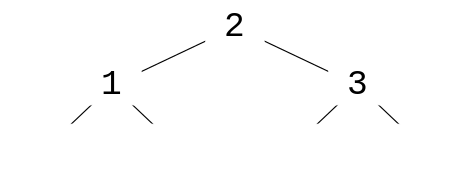

In [47]:
diagram . renderBinTree $ t1

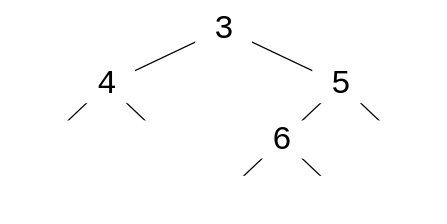

In [48]:
diagram . renderBinTree $ t2

<br>

`x`라는 값이 이진트리 `t`에 들어있는지 `occurs x t`로 검사하는 함수 `occurs`를 작성해 보자.

In [49]:
-- occurs :: Eq a => a -> Tree a -> Bool
occurs x Null           = False
occurs x (Node y t1 t2) = x==y || occurs x t1 || occurs x t2

In [50]:
occurs 1 t2
occurs 3 t2
occurs 4 t2
occurs 6 t2

False

True

True

True

<br>

이진트리가 이진탐색트리(binary search tree, BST)인지 검사하는 함수 `isBST`를 작성해 보자.

이진탐색트리란 이진트리에서 각각의 모든 노드의 값이
  - 그 노드의 왼쪽 부분트리의 값들보다 더 크고
  - 그 노드의 오른쪽 부분트리의 값들보다 더 작다

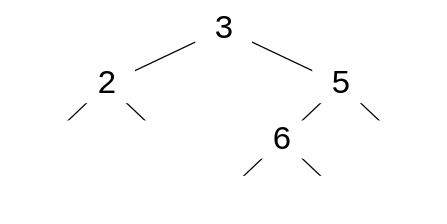

In [51]:
t3 =  Node 3
        (Node 2 Null Null)
        (Node 5
            (Node 6 Null Null)
            Null)
            
diagram . renderBinTree $ t3 -- BST가 아님!!!! 5가 왼쪽에 있는 6보다 더 크지 않다

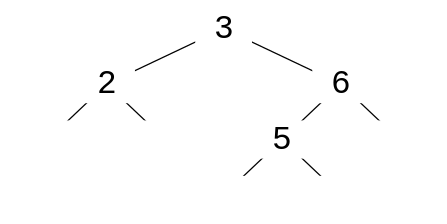

In [52]:
t4 =  Node 3
        (Node 2 Null Null)
        (Node 6
            (Node 5 Null Null)
            Null)
            
diagram . renderBinTree $ t4 -- BST가 맞다!

In [53]:
-- 연습문제 또는 과제로 ... 한번 스스로 해보세요

-- isBST :: Ord a => Tree a -> Bool
isBST Null           = undefined
isBST (Node x t1 t2) = undefined

<br>

`x`라는 값이 이진탐색트리 `t`에 들어있는지 `search x t`로 검사하는 함수 `search`를 작성해 보자.
이진탐색트리(BST)의 성질을 이용하면 `occurs`보다 효과적으로 검사할 수 있다. (`search` 함수의 두번째 인자는 BST라고 가정한다.)

In [54]:
-- search :: Ord a => a -> Tree a -> Bool
search x Null           = False
search x (Node y t1 t2) = if x==y then True
                                  else if x < y then search x t1
                                                else search x t2

In [55]:
search 2 t4
search 5 t4
search 1 t4
search 7 t4

True

True

False

False

In [56]:
search 6 t3 -- 이진트리가 아닌 경우에는 제대로 동작 안함

False

In [57]:
search' x Null           = False
search' x (Node y t1 t2)
  | x == y    = True
  | x <  y    = search' x t1
  | otherwise = search' x t2
  
-- 표준라이브러리에 아래와 같이 정의됨
-- otherwise = True

In [58]:
search' 2 t4
search' 5 t4
search' 1 t4
search' 7 t4

True

True

False

False